<a href="https://colab.research.google.com/github/Jacobopp27/predicciones-de-ventas/blob/main/Prediccion_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto 1 Prediccion Ventas - Parte 5 (base)**

1.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

2.

In [3]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


3.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


NUMERICAS:

'Item_Weight',
'Item_Fat_Content',
'Item_Visibility',
'Item_MRP',
'Outlet_Establishment_Year'

ORDINALES:                                              
'Item_Fat_Content'

NOMINALES:

'Item_Identifier',
'Item_Type',
'Outlet_Identifier',
'Outlet_Size',
'Outlet_Location_Type',
'Outlet_Type'


4.

In [5]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [6]:
replacement_dictionary = {'Low':1, 'Low Fat':1, 'LF':1, 'low fat':1, 'Regular':0, 'reg':0}
df['Item_Fat_Content'].replace(replacement_dictionary, inplace=True)
df['Item_Fat_Content']

0       1
1       0
2       1
3       0
4       1
       ..
8518    1
8519    0
8520    1
8521    0
8522    1
Name: Item_Fat_Content, Length: 8523, dtype: int64

In [7]:
df['Item_Fat_Content'].value_counts()

1    5517
0    3006
Name: Item_Fat_Content, dtype: int64

5.

In [8]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Nuestra variable target (a predecir) es **Item_Outlet_Sales** que corresponde al total de ventas por tienda, para predecir dicha variable nos apoyaremos basados en el resto de categorias que vienen incluidas como peso, contenido graso,categoria, precio, año creacion tienda etc...

Este proceso consiste en dividir nuestro conjunto de datos en 2 grupos (entrenamiento y prueba), y es aqui donde ocurre el proceso de aprendizaje y validacion de nuestro modelo, esto con el proposito de conocer como se va a comportar nuestro target en la medida que nuestro conjunto de caracteristicas se mueva de una o determinada forma.


6.

In [9]:
cat_selector = make_column_selector(dtype_include='object')
cat_selector

In [10]:
cat_selector(X_train)

['Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
num_selector = make_column_selector(dtype_include='number')
num_selector

In [12]:
num_selector(X_train)

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year']

7.Instanciar transformadores

In [13]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

8.

In [14]:
#Pipeline Numerico
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [15]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

9.

In [16]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff508f29d90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff508f7d250>)])

10.

In [17]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff508f29d90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff508f7d250>)])

In [18]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

11.

In [19]:
print(np.isnan(X_train_processed).sum().sum(), 'valores faltantes en datos de entrenamiento')
print(np.isnan(X_test_processed).sum().sum(), 'valores faltantes en datos de prueba')
print('\n')
print('Toda la data en X_train_processed es', X_train_processed.dtype)
print('Toda la data en X_test_processed es', X_test_processed.dtype)
print('\n')
print('shape de la data es', X_train_processed.shape)
print('\n')
X_train_processed

0 valores faltantes en datos de entrenamiento
0 valores faltantes en datos de prueba


Toda la data en X_train_processed es float64
Toda la data en X_test_processed es float64


shape de la data es (6392, 1591)




array([[ 0.81724868,  0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196, -1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638,  0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931,  0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868,  0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

Modelo Regresion Linear

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [21]:
reg.fit(X_train_processed,y_train)


LinearRegression()

In [22]:
#Rendimiento del modelo
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.6715689710976696


In [23]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)


-4.7545596885441446e+19


In [24]:
train_pred_reg = reg.predict(X_train_processed)

test_pred_reg = reg.predict(X_test_processed)

RECM

In [25]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [26]:
mse_train = mean_squared_error(y_train, train_pred_reg)
mse_test = mean_squared_error(y_test, test_pred_reg)

In [27]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred_reg))
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred_reg))

In [28]:
rmse_test


11453262502105.842

In [29]:
rmse_train


985.8889805797247

In [30]:
y_train

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [31]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
4753    3793.7284
4836    2410.8618
8064    5309.7550
4418    2530.7058
1784    4138.6128
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

In [32]:
np.array(y_test)

array([1743.0644,  356.8688,  377.5086, ..., 5309.755 , 2530.7058,
       4138.6128])

In [33]:
np.array(test_pred_reg)


array([ 856.,  984., 1336., ..., 4384., 2000., 2424.])

Arbol de Regresion

In [34]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [35]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
train_pred_1 = dec_tree.predict(X_train_processed)
test_pred_1= dec_tree.predict(X_test_processed)

In [37]:
train_score_1 = dec_tree.score(X_train_processed, y_train)
test_score_1 = dec_tree.score(X_test_processed, y_test)

print(train_score_1)
print(test_score_1)

1.0
0.20973578066623066


In [38]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [39]:
# Esta es la profundidad inicial de nuestro arbol
dec_tree.get_depth()

60

In [41]:
# Nuestro arbol tiene 6.252 nodos hojas
dec_tree.get_n_leaves()

6252

In [42]:
max_profundidad_rango = list(range(2, 37))# calcula un valor entre 2 y 37

# Se almacena la puntuacion de cada valor

r2 = []
for depth in max_profundidad_rango:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

Text(0.5, 1.0, 'Profundidad óptima Árbol de Regresión')

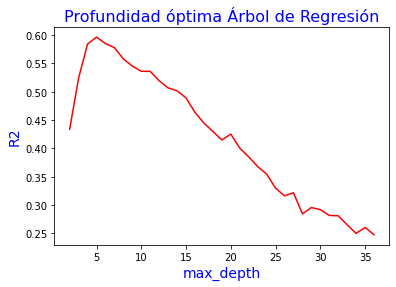

In [43]:
# Visualizar qué valor de max_depth lleva a una puntuación R2 más alta

import matplotlib.pyplot as plt
plt.plot(max_profundidad_rango, r2, color = 'red')
plt.rcParams["figure.figsize"] = (12, 8)
plt.xlabel('max_depth', fontsize = 14 , color = 'blue')
plt.ylabel('R2',fontsize = 14 , color = 'blue');
plt.title('Profundidad óptima Árbol de Regresión', fontsize = 16 , color = 'blue')

In [44]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6042066848171654
0.5960564372160062


In [45]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
4753    3793.7284
4836    2410.8618
8064    5309.7550
4418    2530.7058
1784    4138.6128
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

[Text(0.5229166666666667, 0.9166666666666666, 'X[3] <= 0.025\nsquared_error = 2959455.705\nsamples = 6392\nvalue = 2209.979'),
 Text(0.26666666666666666, 0.75, 'X[1587] <= 0.5\nsquared_error = 967180.653\nsamples = 3170\nvalue = 1364.229'),
 Text(0.13333333333333333, 0.5833333333333334, 'X[3] <= -0.995\nsquared_error = 886028.954\nsamples = 2780\nvalue = 1526.416'),
 Text(0.06666666666666667, 0.4166666666666667, 'X[4] <= -1.413\nsquared_error = 262960.182\nsamples = 992\nvalue = 898.343'),
 Text(0.03333333333333333, 0.25, 'X[3] <= -1.415\nsquared_error = 448039.139\nsamples = 144\nvalue = 1417.447'),
 Text(0.016666666666666666, 0.08333333333333333, 'squared_error = 196114.505\nsamples = 83\nvalue = 1078.532'),
 Text(0.05, 0.08333333333333333, 'squared_error = 421876.622\nsamples = 61\nvalue = 1878.593'),
 Text(0.1, 0.25, 'X[3] <= -1.263\nsquared_error = 178002.591\nsamples = 848\nvalue = 810.194'),
 Text(0.08333333333333333, 0.08333333333333333, 'squared_error = 124216.977\nsamples = 6

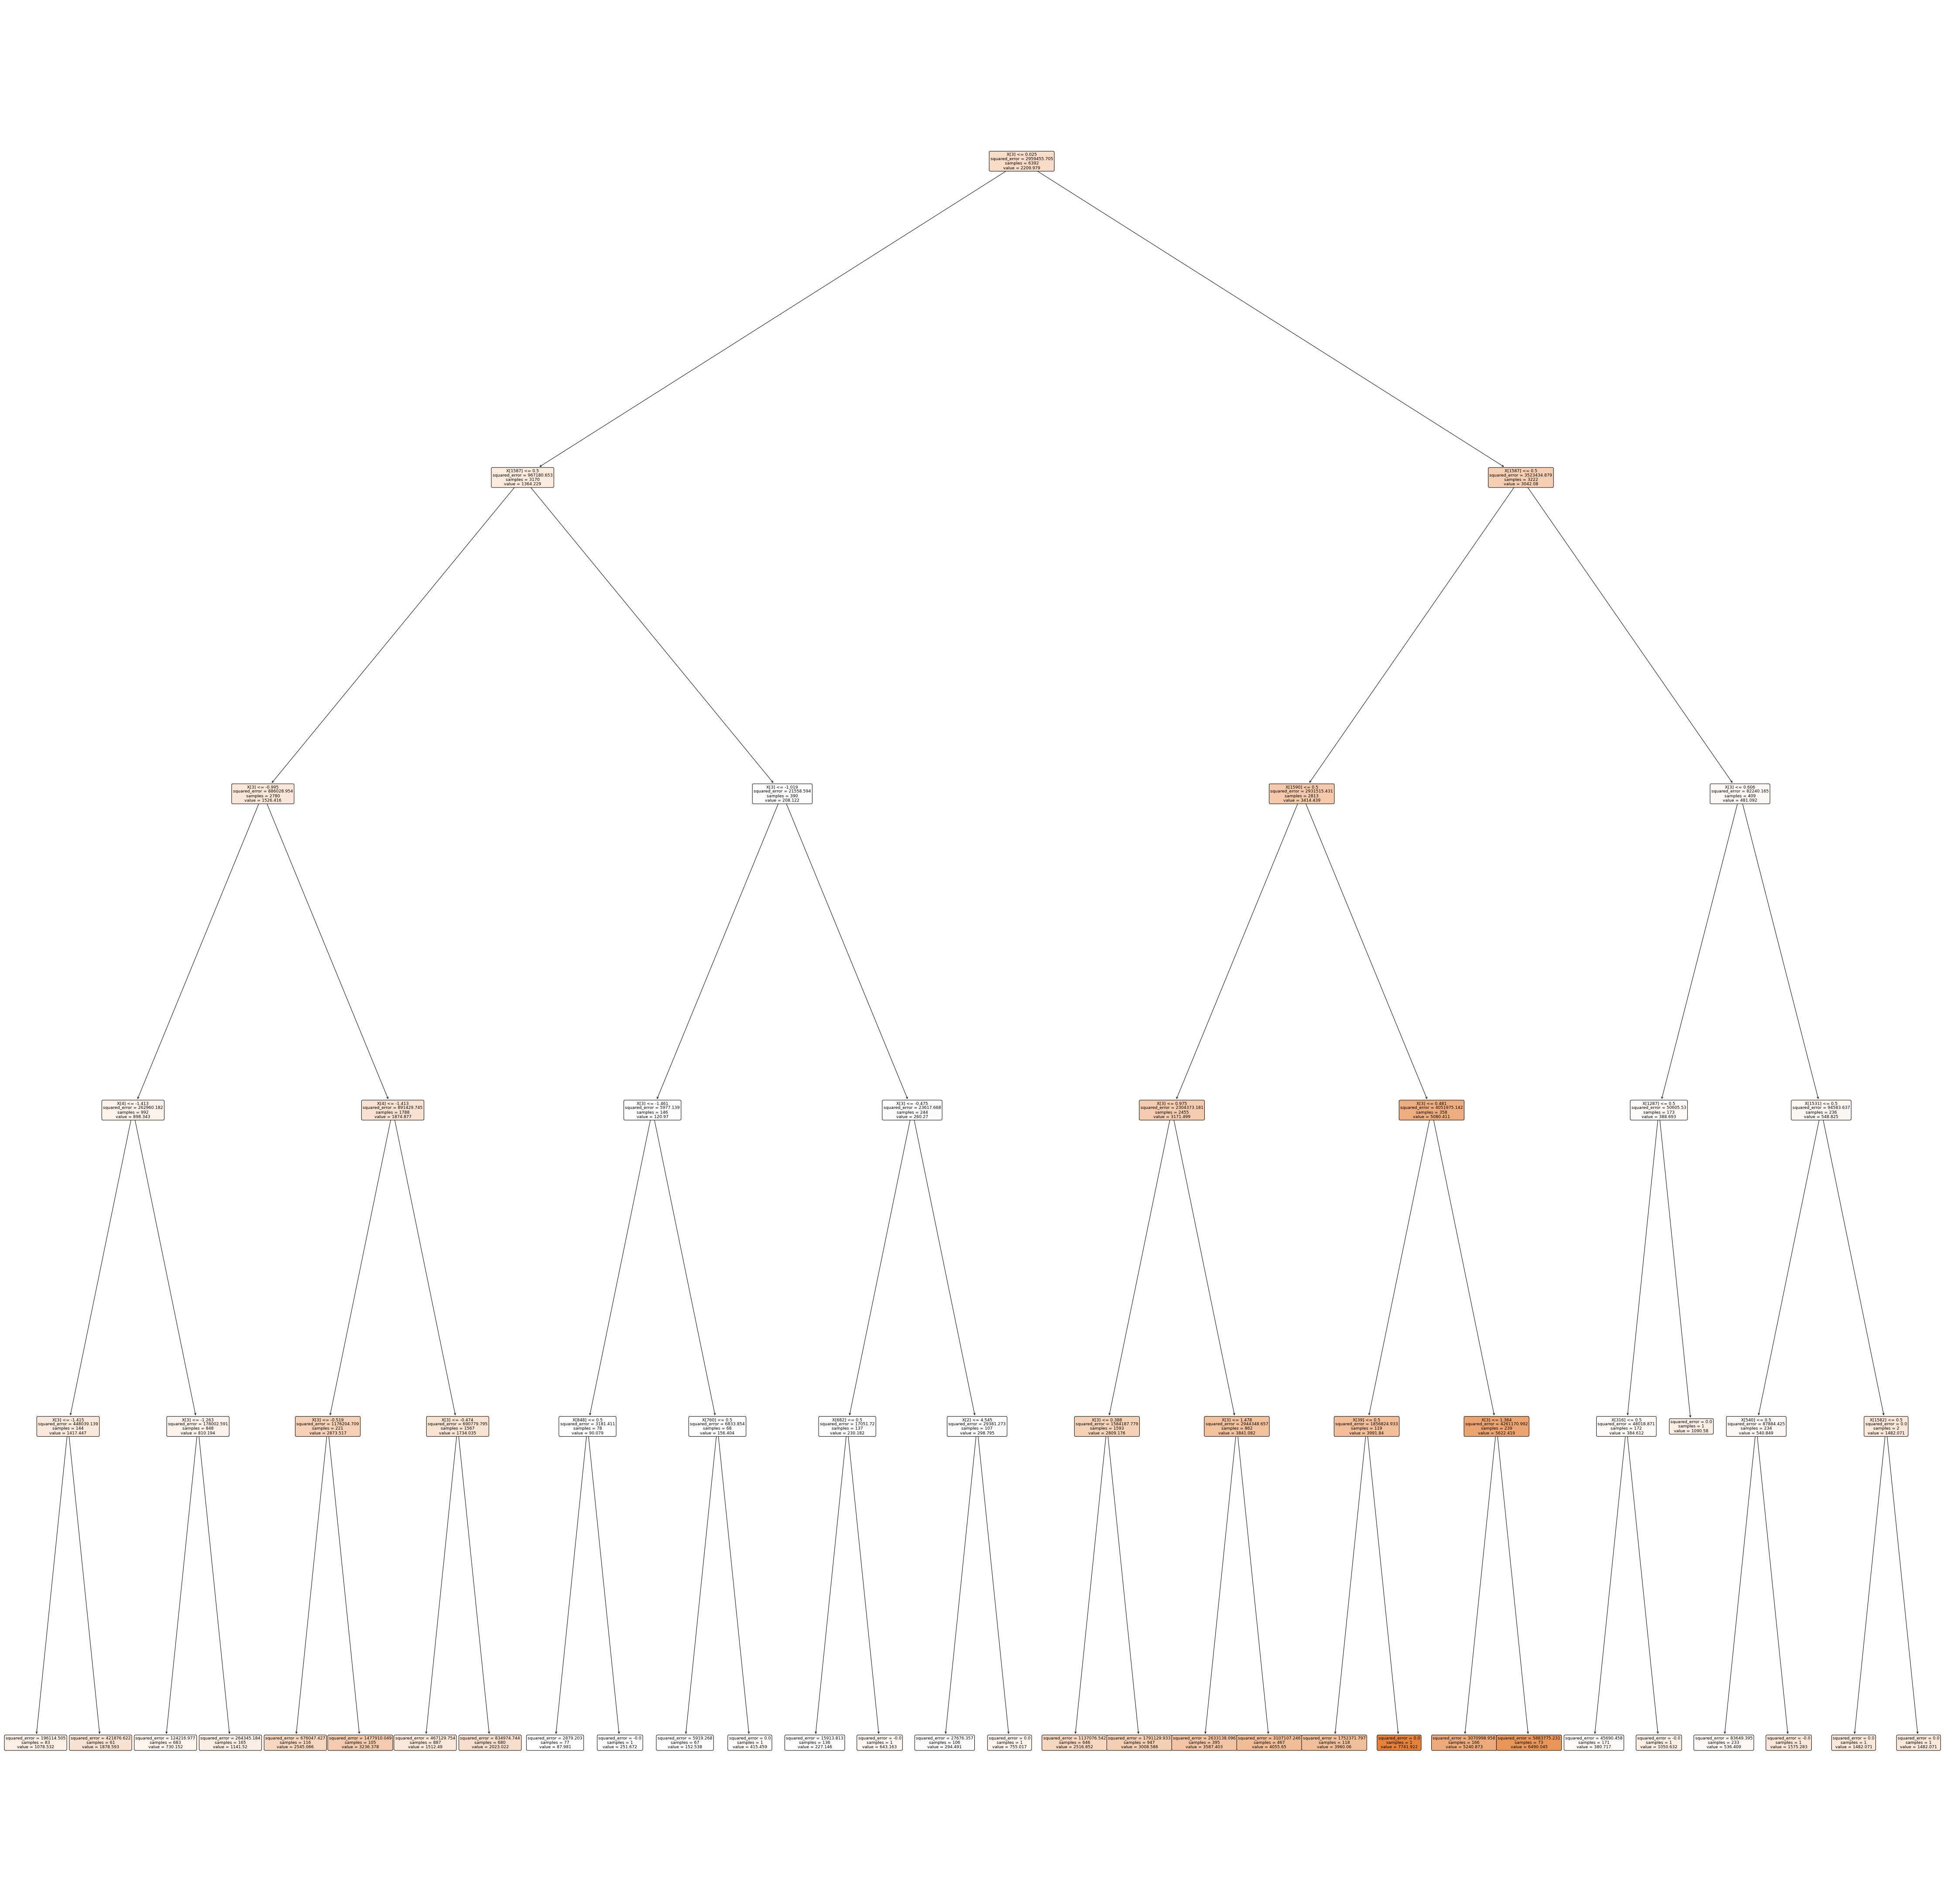

In [46]:
from sklearn import tree
plt.figure(figsize=(80,80))
tree.plot_tree(dec_tree_5,
               rounded = True,
               filled = True)

In [47]:
np.array(y_test)

array([1743.0644,  356.8688,  377.5086, ..., 5309.755 , 2530.7058,
       4138.6128])

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=5) # Prueba cambiar el hiperparámetro de profundidad máxima!
tree_reg.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=5)